Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv("Fraud_check.csv")
df.describe()
df.isna().sum()
df.rename(columns={"Marital.Status":"MaritalStatus","Taxable.Income":"TaxableIncome","City.Population":"CityPopulation","Work.Experience":"WorkExperience"},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    object
 1   MaritalStatus   600 non-null    object
 2   TaxableIncome   600 non-null    int64 
 3   CityPopulation  600 non-null    int64 
 4   WorkExperience  600 non-null    int64 
 5   Urban           600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [3]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Select object columns
object_columns = df.select_dtypes(include=['object']).columns

# Create a dictionary to store the mapping of encoded values to original string values
label_dict = {}

# Apply label encoding to each object column and store the mapping in label_dict
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_dict[col] = dict(zip(le.transform(le.classes_), le.classes_))
    print(label_dict[col])
# Print the mapping of encoded values to original string values for the 'Undergrad' column



{0: 'NO', 1: 'YES'}
{0: 'Divorced', 1: 'Married', 2: 'Single'}
{0: 'NO', 1: 'YES'}


In [16]:
df["FraudCheck"] = df["TaxableIncome"].apply(lambda x: "Risky" if x <= 30000 else "Good")

# we can also Drop these unnecessary Features so that our tea depth is decreased and accuracy is also good but here since the acurracy is good no need
# df.drop(columns=["MaritalStatus","Undergrad","Urban"],inplace=True)

x = df.iloc[:,:-1]
y = df['FraudCheck']
le = LabelEncoder()

y = le.fit_transform(y)
y
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

dt = DecisionTreeClassifier(criterion='entropy')
xtrain.count()

Undergrad         480
MaritalStatus     480
TaxableIncome     480
CityPopulation    480
WorkExperience    480
Urban             480
dtype: int64

In [19]:
dt.fit(xtrain,ytrain)

ypred = dt.predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        23

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [9]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  1.0


Here both Training and test accuracy is great so we dont need to do hypertuning

# visualisation

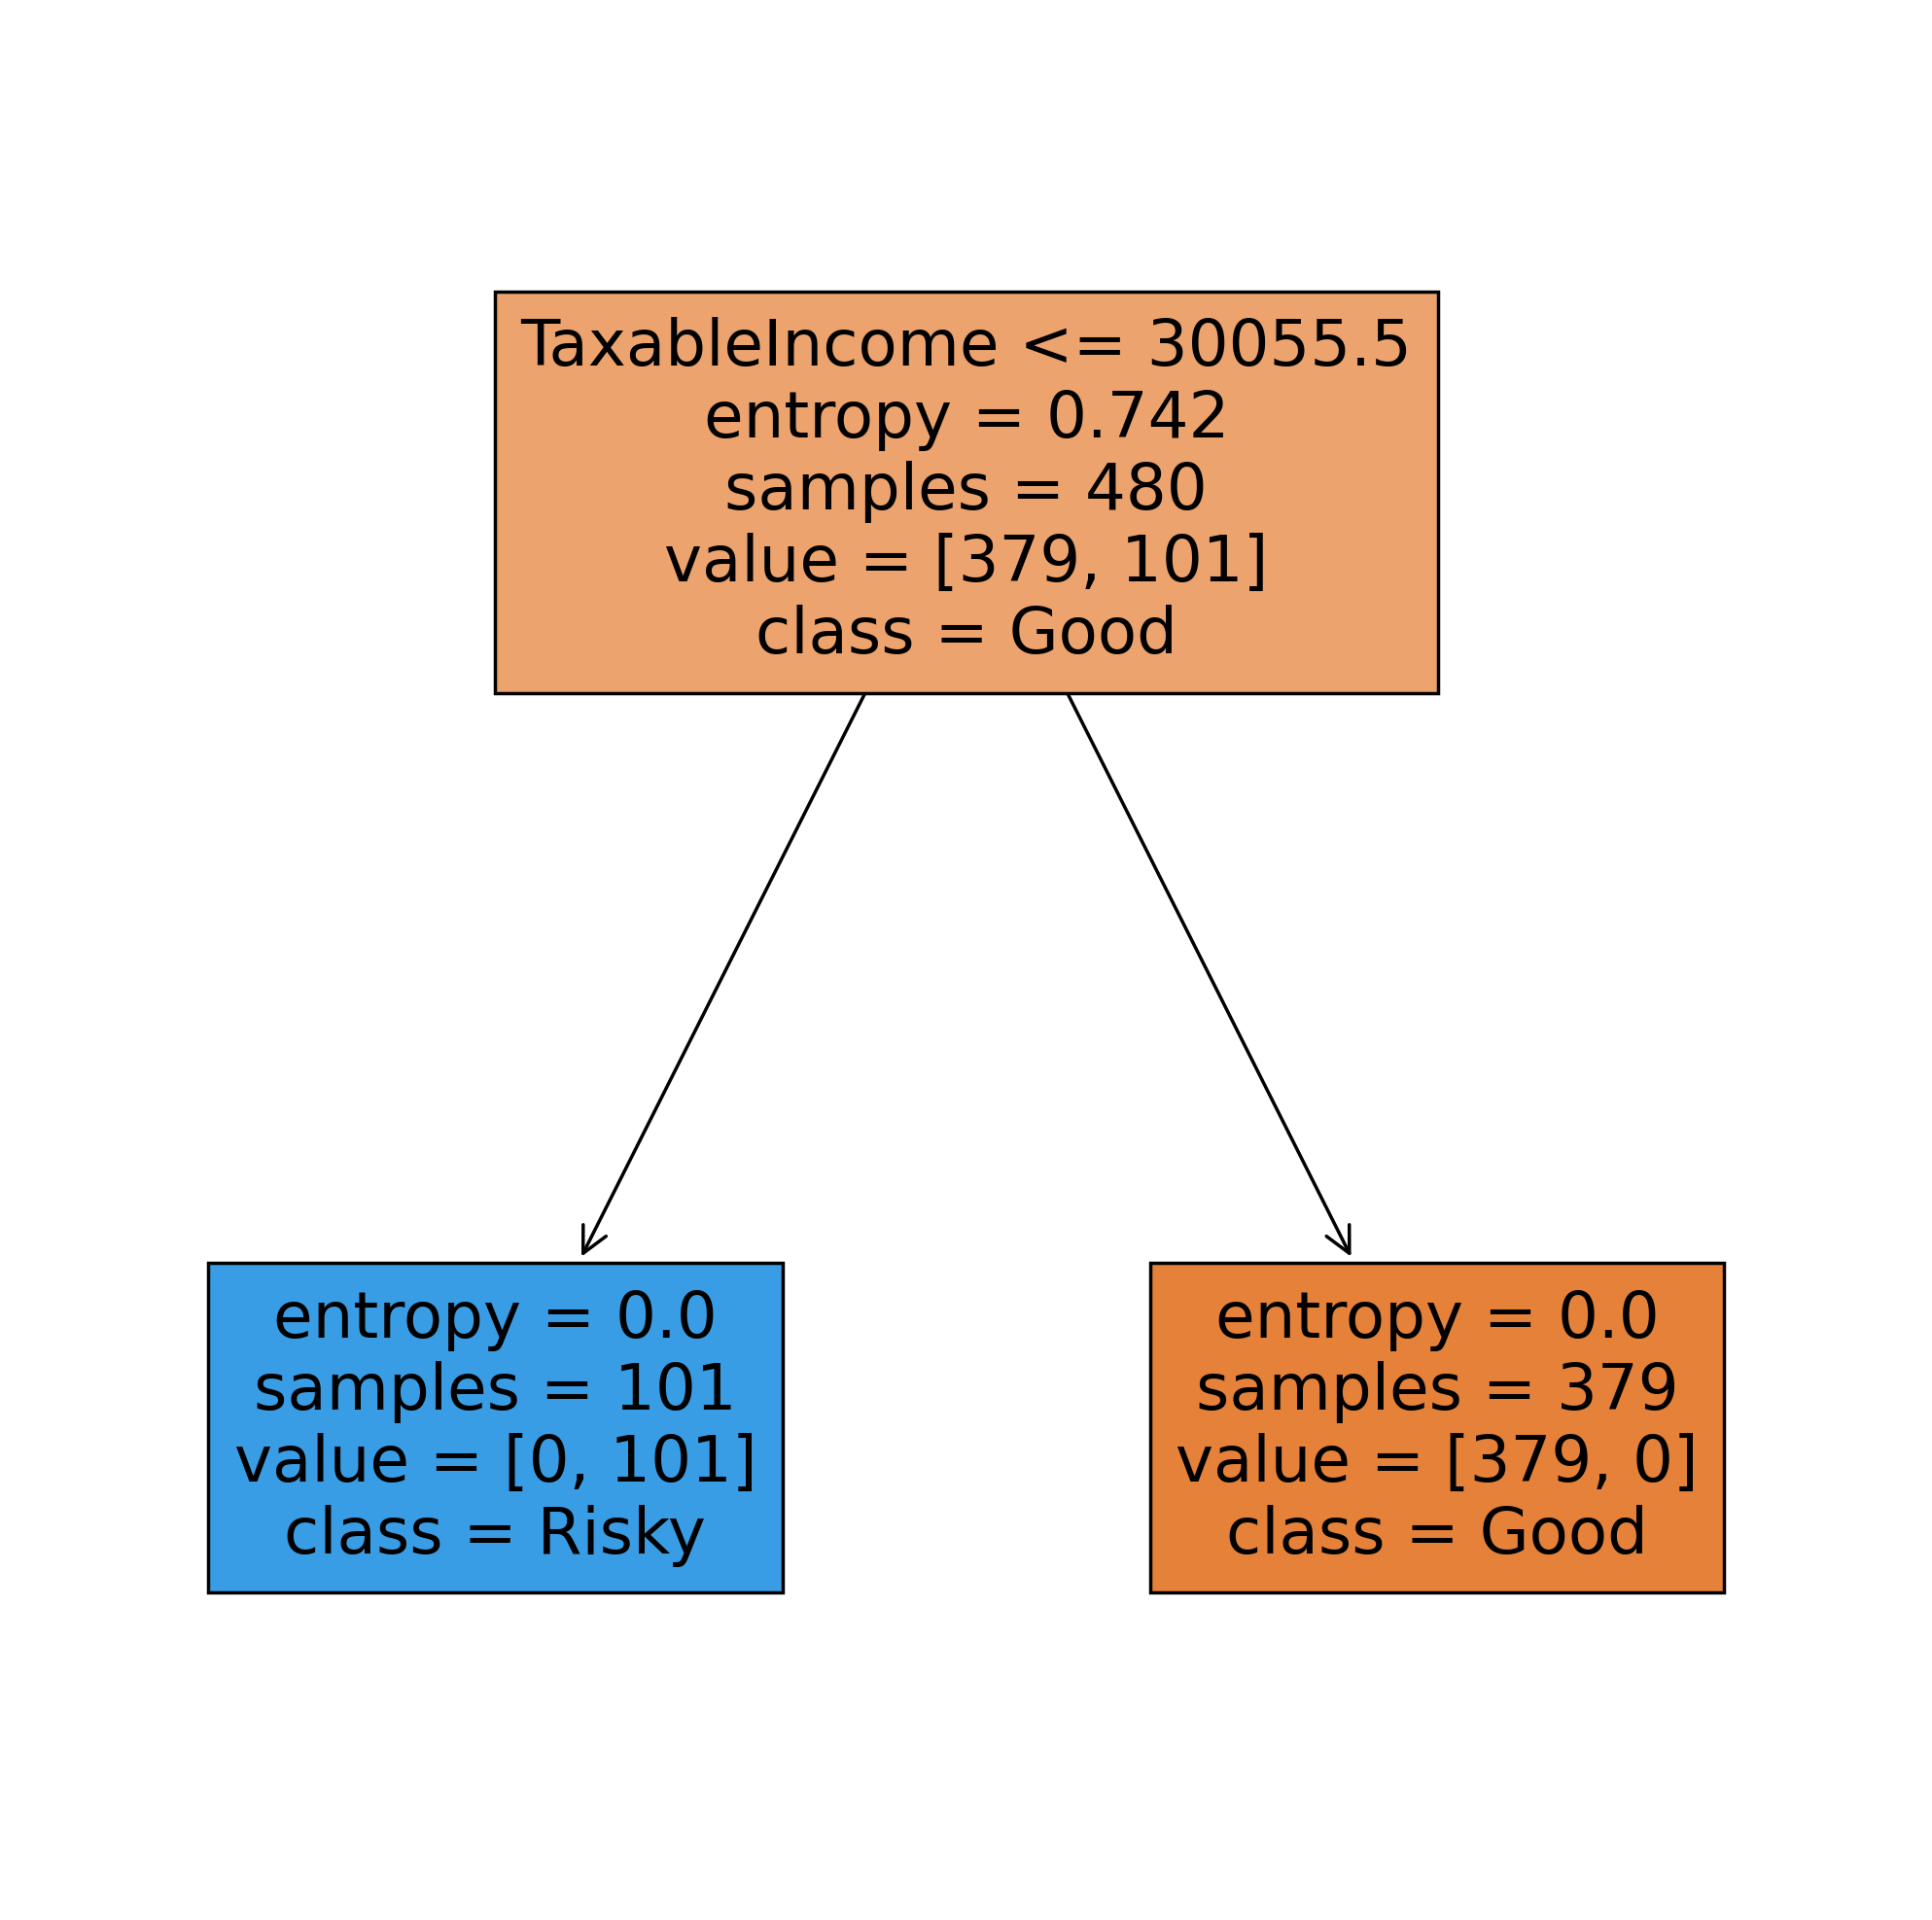

In [22]:
# tree.plot_tree(dt)
# plt.show()
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 250
tree.plot_tree(dt, feature_names=x.columns, 
               class_names=df['FraudCheck'].unique(),
              filled=True)
plt.show()

In [ ]:
# DECISION TREE CAN BE USED FOR GETTING THE FEATURE IMPORTANCE ALSO SO IT IS HELFUL IN FEATURE SELECTION PROCESS AS WELL

In [24]:
dt.feature_importances_


array([0., 0., 1., 0., 0., 0.])

In [25]:
x.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [26]:
df['FraudCheck']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: FraudCheck, Length: 600, dtype: object